Analysis considering only numerical features

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Data Science ChatBot

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Data Science ChatBot


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.stats import shapiro, kstest, anderson 

In [3]:
df = pd.read_csv('train.csv', sep = ',')
df = df.dropna()
y = df['Activity']
dff = df.drop(columns='Activity', axis=1)
X= dff.select_dtypes(exclude=['int64'])       #consider only numerical

# Correlation

In [4]:
corr_matrix = X.corr()
correlations = corr_matrix.abs()
upper_triangle = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))
features_correlations = upper_triangle.stack()[upper_triangle.stack() > 0.9].index.tolist()

print('There are', len(features_correlations), 'high correlations:')
for corr in features_correlations:
    print(corr[0], corr[1], (corr_matrix[corr[0]].loc[corr[1]]).round(4))

There are 27 high correlations:
D116 D125 0.9054
D195 D203 0.9049
D290 D778 0.9098
D309 D310 0.9078
D332 D382 0.9104
D342 D435 0.9159
D370 D618 0.9215
D399 D567 0.9368
D407 D718 0.9067
D454 D587 0.905
D464 D679 0.9105
D467 D682 0.9011
D468 D683 0.92
D477 D704 0.9026
D478 D707 0.9026
D503 D581 0.9007
D515 D810 0.9035
D519 D815 0.9037
D540 D638 0.9789
D565 D566 0.9035
D566 D567 0.9131
D581 D840 0.9441
D789 D873 0.9285
D820 D826 0.9445
D856 D857 0.9658
D895 D896 0.9079
D926 D927 0.9042


/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


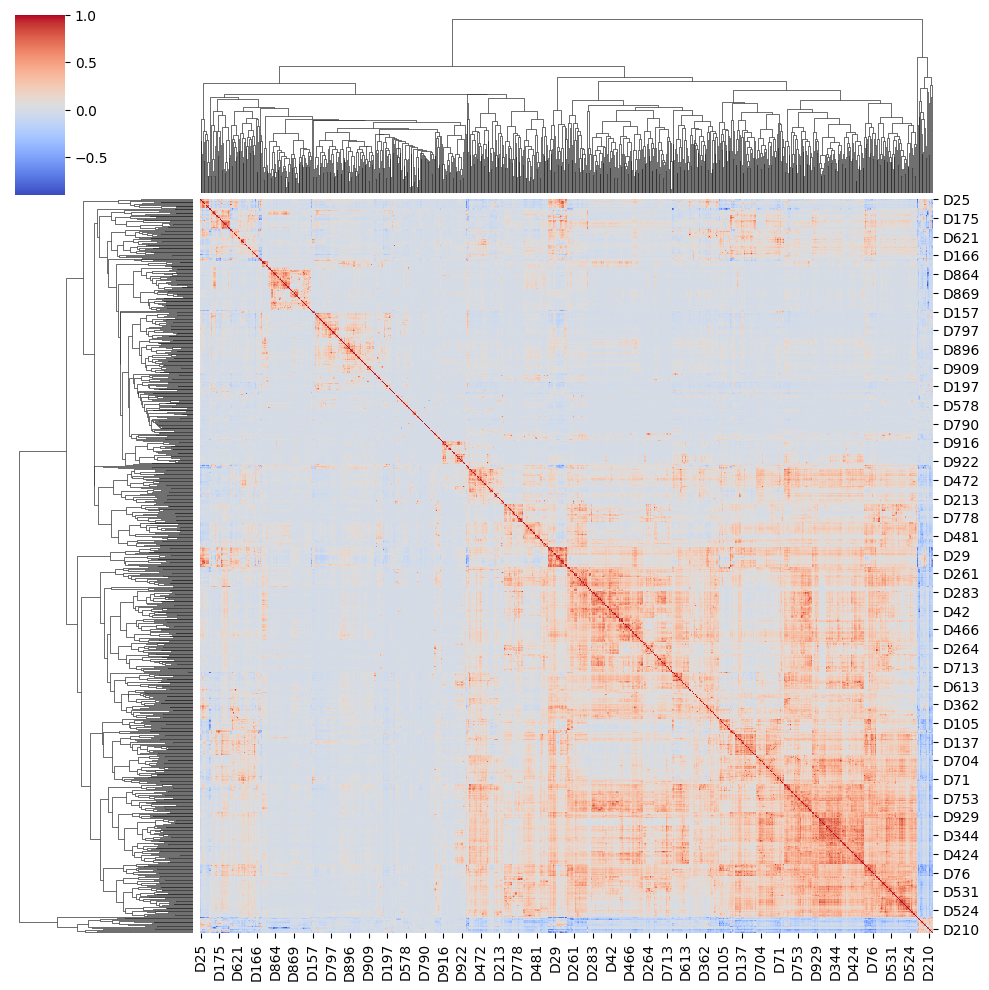

In [5]:
sns.clustermap(X.corr(), annot=False, cmap='coolwarm')
plt.show()

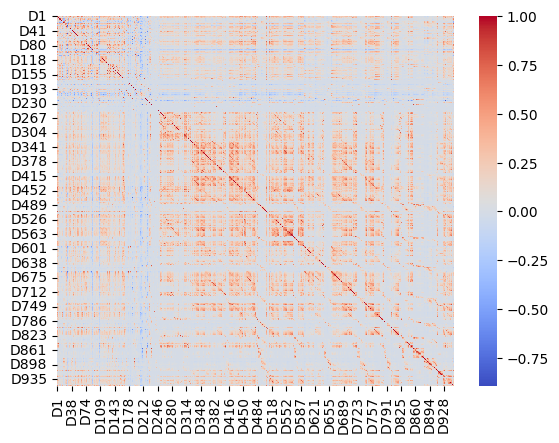

In [6]:
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.show()

# Normality Test

In [7]:
results = {}

for column in X.columns:
    stat_s, p_s = shapiro(X[column])        
    stat_k, p_k = kstest(X[column],  'norm')
    results[column] = {"shaprio": stat_s, "p-value Shapiro": p_s, "Kolmogorov-Smirnov": stat_k, "p-value Kolmogorv": p_k}

stats = pd.DataFrame(results).transpose()

In [8]:
stats.head(10)

,shaprio,p-value Shapiro,Kolmogorov-Smirnov,p-value Kolmogorv
D1,0.741347,0.000000e+00,0.500000,0.0
D2,0.994651,1.662300e-10,0.637487,0.0
D3,0.796031,0.000000e+00,0.500000,0.0
D4,0.373212,0.000000e+00,0.500000,0.0
D5,0.900130,3.503246e-44,0.511839,0.0
D6,0.976909,3.214073e-24,0.694595,0.0
D7,0.986923,3.751889e-18,0.530941,0.0
D8,0.914215,8.119123e-42,0.526761,0.0
D9,0.960501,8.234575e-31,0.708888,0.0
D10,0.972368,2.488351e-26,0.508463,0.0


In [9]:
X_cbrt = np.cbrt(X)

In [10]:
results_cbrt = {}

for column in X_cbrt.columns:
    stat_s, p_s = shapiro(X_cbrt[column])
    stat_k, p_k = kstest(X_cbrt[column],  'norm')
    results_cbrt[column] = {"shapiro": stat_s, "p-value Shapiro": p_s, "Kolmogorov-Smirnov": stat_k, "p-value Kolmogorv": p_k}

stats_cbrt = pd.DataFrame(results_cbrt).transpose()

In [11]:
stats_cbrt.head(10)

,shapiro,p-value Shapiro,Kolmogorov-Smirnov,p-value Kolmogorv
D1,0.858846,0.000000e+00,0.500000,0.0
D2,0.995419,2.051532e-09,0.758678,0.0
D3,0.813881,0.000000e+00,0.500000,0.0
D4,0.404100,0.000000e+00,0.500000,0.0
D5,0.984551,7.816867e-20,0.643546,0.0
D6,0.973355,6.780584e-26,0.783966,0.0
D7,0.978132,1.343245e-23,0.668369,0.0
D8,0.798445,0.000000e+00,0.658010,0.0
D9,0.949198,3.440156e-34,0.786493,0.0
D10,0.919876,8.884653e-41,0.645131,0.0


# PCA

In [12]:
n_components = 5

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Target'

fig = px.scatter_matrix(
    components,
    color=y,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [13]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [14]:
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [15]:
principal_components = pca.transform(X)

column_names = [f"PC {i+1}" for i in range(principal_components.shape[1])]
X_pca = pd.DataFrame(principal_components, columns=column_names)

X_pca.to_csv('principal_components.csv', index=False)

# Feature Selection

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [18]:
n_features = [942, 900, 800, 700, 600, 300, 100, 50, 10]

**Lasso**

In [19]:
lasso = LassoCV(max_iter = 10000, n_jobs = -1)
lasso.fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index=X_pca.columns)
coef_sorted = coef.abs().sort_values(ascending=False)

In [20]:
coef_df = abs(lasso.coef_)
coef_lasso_df = pd.DataFrame({'Feature Name': X_pca.columns, 'Coefficients': coef_df})
coef_lasso_df = coef_lasso_df.sort_values('Coefficients', ascending=False)

coef_lasso_df

,Feature Name,Coefficients
75,PC 76,0.517271
112,PC 113,0.466722
166,PC 167,0.452784
89,PC 90,0.404639
107,PC 108,0.402693
...,...,...
418,PC 419,0.000000
419,PC 420,0.000000
420,PC 421,0.000000
421,PC 422,0.000000


In [21]:
selected_features = list(X_train.columns[lasso.coef_ != 0])
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

In [22]:
svm = SVC()
svm.fit(X_train_lasso, y_train)
svm_score = svm.score(X_test_lasso, y_test)
print("SVM accuracy with", np.shape(selected_features)[0], "features given by Lasso:", svm_score)

SVM accuracy with 156 features given by Lasso: 0.7788632326820604


In [23]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_lasso, y_train)
lr_score = lr.score(X_test_lasso, y_test)
print("Logistic Regression accuracy with", np.shape(selected_features)[0], "features given by Lasso:", lr_score)

Logistic Regression accuracy with 156 features given by Lasso: 0.7628774422735346


In [24]:
for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features]
    selected_features_test = X_test[top_k_features]
    svm = SVC()
    svm.fit(selected_features_train, y_train)
    svm_score = svm.score(selected_features_test, y_test)
    print("SVM accuracy with", k, "features:", svm_score)

print()
print("###############")
print()

for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features]
    selected_features_test = X_test[top_k_features]
    lr = LogisticRegression(max_iter=10000)
    lr.fit(selected_features_train, y_train)
    lr_score = lr.score(selected_features_test, y_test)
    print("Logistic Regression accuracy with", k, "features:", lr_score)

SVM accuracy with 942 features: 0.7904085257548845
SVM accuracy with 900 features: 0.7912966252220248
SVM accuracy with 800 features: 0.7912966252220248
SVM accuracy with 700 features: 0.7886323268206039
SVM accuracy with 600 features: 0.7824156305506217
SVM accuracy with 300 features: 0.7797513321492007
SVM accuracy with 100 features: 0.7744227353463587
SVM accuracy with 50 features: 0.7433392539964476
SVM accuracy with 10 features: 0.5870337477797514

###############

Logistic Regression accuracy with 942 features: 0.7770870337477798
Logistic Regression accuracy with 900 features: 0.7779751332149201
Logistic Regression accuracy with 800 features: 0.7744227353463587
Logistic Regression accuracy with 700 features: 0.7673179396092362
Logistic Regression accuracy with 600 features: 0.761101243339254
Logistic Regression accuracy with 300 features: 0.7637655417406749
Logistic Regression accuracy with 100 features: 0.7522202486678508
Logistic Regression accuracy with 50 features: 0.67850799

**Ridge**

In [25]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
coef = pd.Series(ridge.coef_, index=X_pca.columns)
coef_sorted = coef.abs().sort_values(ascending=False)

In [26]:
coef_df = abs(ridge.coef_)
coef_ridge_df = pd.DataFrame({'Feature Name': X_pca.columns, 'Coefficients': coef_df})
coef_ridge_df = coef_ridge_df.sort_values('Coefficients', ascending=False)

coef_ridge_df

,Feature Name,Coefficients
75,PC 76,4.035052e-01
112,PC 113,3.207266e-01
89,PC 90,3.090725e-01
107,PC 108,2.725524e-01
166,PC 167,2.648552e-01
...,...,...
938,PC 939,1.722682e-05
936,PC 937,2.819998e-06
747,PC 748,1.347254e-06
940,PC 941,2.118591e-12


In [27]:
for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features]
    selected_features_test = X_test[top_k_features]
    svm = SVC()
    svm.fit(selected_features_train, y_train)
    svm_score = svm.score(selected_features_test, y_test)
    print("SVM accuracy with", k, "features:", svm_score)

print()
print("###############")
print()

for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features]
    selected_features_test = X_test[top_k_features]
    lr = LogisticRegression(max_iter=10000)
    lr.fit(selected_features_train, y_train)
    lr_score = lr.score(selected_features_test, y_test)
    print("Logistic Regression accuracy with", k, "features:", lr_score)

SVM accuracy with 942 features: 0.7904085257548845
SVM accuracy with 900 features: 0.7904085257548845
SVM accuracy with 800 features: 0.7904085257548845
SVM accuracy with 700 features: 0.7921847246891652
SVM accuracy with 600 features: 0.7939609236234458
SVM accuracy with 300 features: 0.7921847246891652
SVM accuracy with 100 features: 0.7726465364120781
SVM accuracy with 50 features: 0.7460035523978685
SVM accuracy with 10 features: 0.6234458259325044

###############

Logistic Regression accuracy with 942 features: 0.7770870337477798
Logistic Regression accuracy with 900 features: 0.7770870337477798
Logistic Regression accuracy with 800 features: 0.7770870337477798
Logistic Regression accuracy with 700 features: 0.7744227353463587
Logistic Regression accuracy with 600 features: 0.7744227353463587
Logistic Regression accuracy with 300 features: 0.7735346358792184
Logistic Regression accuracy with 100 features: 0.7477797513321492
Logistic Regression accuracy with 50 features: 0.6927175

**ElastcNet**

In [28]:
elasticnet = ElasticNetCV(max_iter = 10000, n_jobs = -1)
elasticnet.fit(X_train, y_train)
coef = pd.Series(elasticnet.coef_, index=X_pca.columns)
coef_sorted = coef.abs().sort_values(ascending=False)

In [29]:
coef_df = abs(elasticnet.coef_)
coef_elasticnet_df = pd.DataFrame({'Feature Name': X_pca.columns, 'Coefficients': coef_df})
coef_elasticnet_df = coef_elasticnet_df.sort_values('Coefficients', ascending=False)

coef_elasticnet_df

,Feature Name,Coefficients
75,PC 76,0.502775
112,PC 113,0.444049
166,PC 167,0.415402
89,PC 90,0.389852
107,PC 108,0.383636
...,...,...
428,PC 429,0.000000
429,PC 430,0.000000
430,PC 431,0.000000
431,PC 432,0.000000


In [30]:
selected_features = list(X_train.columns[elasticnet.coef_ != 0])
X_train_elasticnet = X_train[selected_features]
X_test_elasticnet = X_test[selected_features]

In [31]:
svm = SVC()
svm.fit(X_train_elasticnet, y_train)
svm_score = svm.score(X_test_elasticnet, y_test)
print("SVM accuracy with", np.shape(selected_features)[0], "features given by ElasticNet:", svm_score)

SVM accuracy with 170 features given by ElasticNet: 0.7815275310834814


In [32]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_lasso, y_train)
lr_score = lr.score(X_test_lasso, y_test)
print("Logistic Regression accuracy with", np.shape(selected_features)[0], "features given by ElasticNet:", lr_score)

Logistic Regression accuracy with 170 features given by ElasticNet: 0.7628774422735346


In [33]:
for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features] 
    selected_features_test = X_test[top_k_features]
    svm = SVC()
    svm.fit(selected_features_train, y_train)
    svm_score = svm.score(selected_features_test, y_test)
    print("SVM accuracy with", k, "features:", svm_score)

print()
print("###############")
print()

for k in n_features:
    top_k_features = coef_sorted[:k].index.tolist()
    selected_features_train = X_train[top_k_features]
    selected_features_test = X_test[top_k_features]
    lr = LogisticRegression(max_iter=10000)
    lr.fit(selected_features_train, y_train)
    lr_score = lr.score(selected_features_test, y_test)
    print("Logistic Regression accuracy with", k, "features:", lr_score)

SVM accuracy with 942 features: 0.7904085257548845
SVM accuracy with 900 features: 0.7904085257548845
SVM accuracy with 800 features: 0.7904085257548845
SVM accuracy with 700 features: 0.7904085257548845
SVM accuracy with 600 features: 0.7841918294849023
SVM accuracy with 300 features: 0.7815275310834814
SVM accuracy with 100 features: 0.7690941385435168
SVM accuracy with 50 features: 0.7433392539964476
SVM accuracy with 10 features: 0.5870337477797514

###############

Logistic Regression accuracy with 942 features: 0.7770870337477798
Logistic Regression accuracy with 900 features: 0.7761989342806395
Logistic Regression accuracy with 800 features: 0.7744227353463587
Logistic Regression accuracy with 700 features: 0.7761989342806395
Logistic Regression accuracy with 600 features: 0.7682060390763765
Logistic Regression accuracy with 300 features: 0.7673179396092362
Logistic Regression accuracy with 100 features: 0.7486678507992895
Logistic Regression accuracy with 50 features: 0.6785079